In [1]:
# Cargamos la librerías
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt


In [2]:
# Shape de municipios de la zona metropolitana de valle de México
municipios = gpd.read_file('/home/milo/PCIC/Maestría/2doSemestre/redes_sis_complejos/proyecto/github/datos/muni_metro.geojson')

# Vemos su sistema de referencia
municipios.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

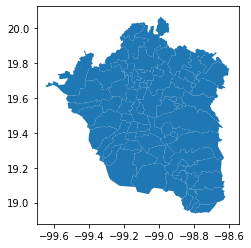

In [3]:
# Visualizamos
municipios.plot()

In [4]:
## Para hacer el grid obtenemos los límites de la capa
xmin,ymin,xmax,ymax = municipios.total_bounds

length = 2000/110000  ### 2000 metros -->5500/110000
wide = 2000/80000 ### 2000 metros -->5500/80000

cols = list(np.arange(xmin,xmax,wide))
rows = list(np.arange(ymin,ymax,length))

rows.reverse()
polygons = []
for x in cols:
    for y in rows:
        polygons.append( Polygon([(x,y), (x+wide, y), (x+wide, y-length), (x, y-length)]) )


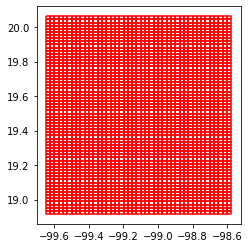

In [5]:
grid = gpd.GeoDataFrame({'geometry':polygons})
grid.boundary.plot(color ='red')

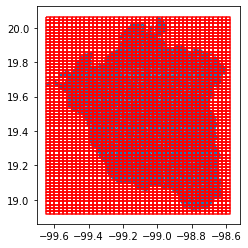

In [6]:
municipios.plot(ax=grid.boundary.plot(color ='red'))

NameError: name 'ctx' is not defined

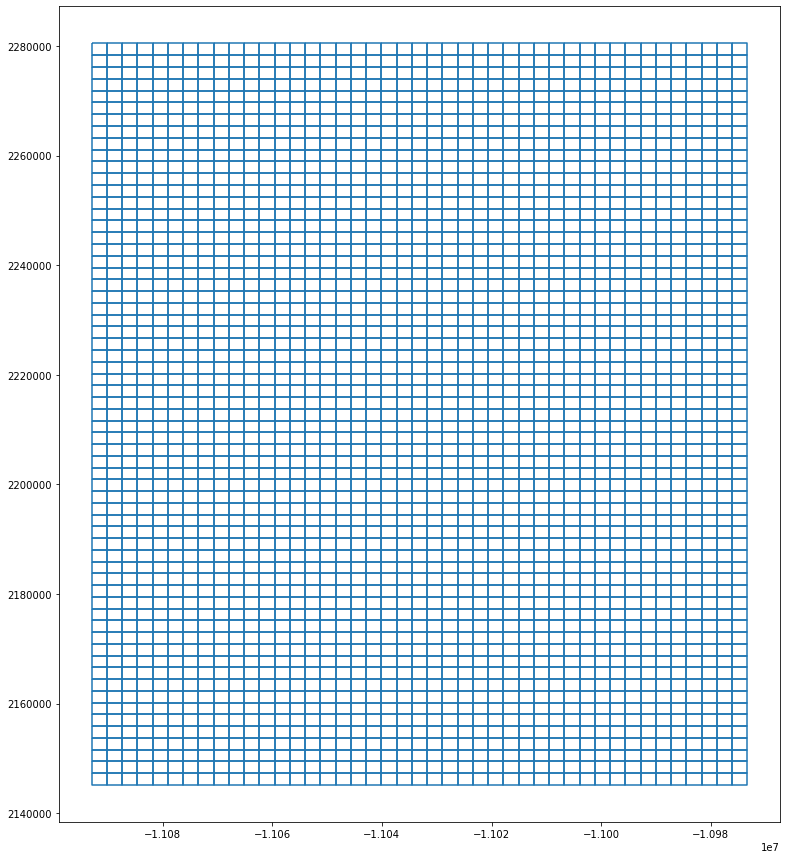

In [7]:
## Visualización usando contextily

# Asignamos sistema de referencia
grid.crs = "EPSG:4326"

# Como los serividores de mapas web están por lo general en Web Mercator (EPSG 3857), cambiamos el sistema de refencia
ax=grid.to_crs('EPSG:3857').boundary.plot(figsize=(15, 15))

ctx.add_basemap(ax)

# https://dlab.berkeley.edu/blog/adding-basemaps-python-contextily